In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec

import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def simple_threshold(im, threshold=.5):
    return ((im > threshold)).astype("float32")

In [3]:
batch_size = 128
epochs = 6

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

TypeError: Invalid dimensions for image data

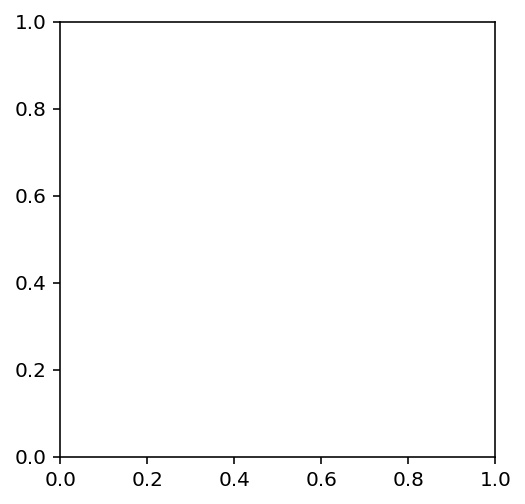

In [19]:
plt.imshow(x_train[1], cmap="cool")

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = np.array([simple_threshold(x) for x in x_train])
x_test = np.array([simple_threshold(x) for x in x_test])

In [10]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dense(248, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(56, activation='sigmoid'))
# ----------------------------------------
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(56, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(248, activation='sigmoid'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(784, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 248)               127224    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               31872     
_________________________________________________________________
dense_4 (Dense)              (None, 56)                7224      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 114       
_________________________________________________________________
dense_6 (Dense)              (None, 56)                168       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               7296      
__________

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, x_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 24s 403us/step - loss: 606.4471 - acc: 0.0000e+00 - val_loss: 613.1222 - val_acc: 0.0000e+00
Epoch 2/6
60000/60000 [==============================] - 24s 394us/step - loss: 594.6883 - acc: 0.0033 - val_loss: 597.5599 - val_acc: 0.0000e+00
Epoch 3/6
60000/60000 [==============================] - 24s 394us/step - loss: 586.4014 - acc: 0.0000e+00 - val_loss: 590.4729 - val_acc: 0.0000e+00
Epoch 4/6
60000/60000 [==============================] - 24s 394us/step - loss: 580.3850 - acc: 3.3333e-05 - val_loss: 586.3249 - val_acc: 0.0000e+00
Epoch 5/6
60000/60000 [==============================] - 24s 394us/step - loss: 577.5592 - acc: 0.0000e+00 - val_loss: 584.9814 - val_acc: 0.0000e+00
Epoch 6/6
60000/60000 [==============================] - 24s 393us/step - loss: 575.8217 - acc: 8.3333e-05 - val_loss: 583.4398 - val_acc: 0.0000e+00


In [13]:
pred = model.predict(x_train)

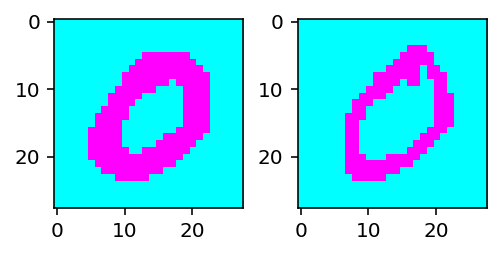

In [20]:
k = 1
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(4, 1,1)
plt.imshow(x_train[k].reshape(28, 28),cmap="cool")
fig.add_subplot(4, 2,1)
plt.imshow(simple_threshold(pred[k]).reshape(28, 28),cmap="cool")
plt.show()

In [15]:
from keras import backend as K
get_image = K.function([model.layers[5].input, K.learning_phase()],
                           [model.layers[-1].output])

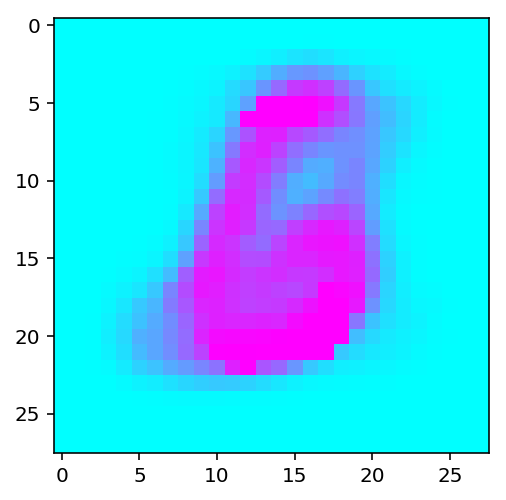

In [16]:
vector = np.array([0.8, .3]).reshape(1,2)
h1 = get_image([vector])[0]
plt.imshow(h1.reshape(28, 28), cmap="cool")

In [17]:
images = [0]*10
vectors = [0]*10
for i in range(10):
    images[i] = [0]*10
    vectors[i] = [0]*10
for f in range(10):
    for j in range(10):
        vectors[f][j] = np.array([f/10, j/10])
        images[f][j] = get_image([vectors[f][j].reshape(-1,2)])[0].reshape(28, 28)

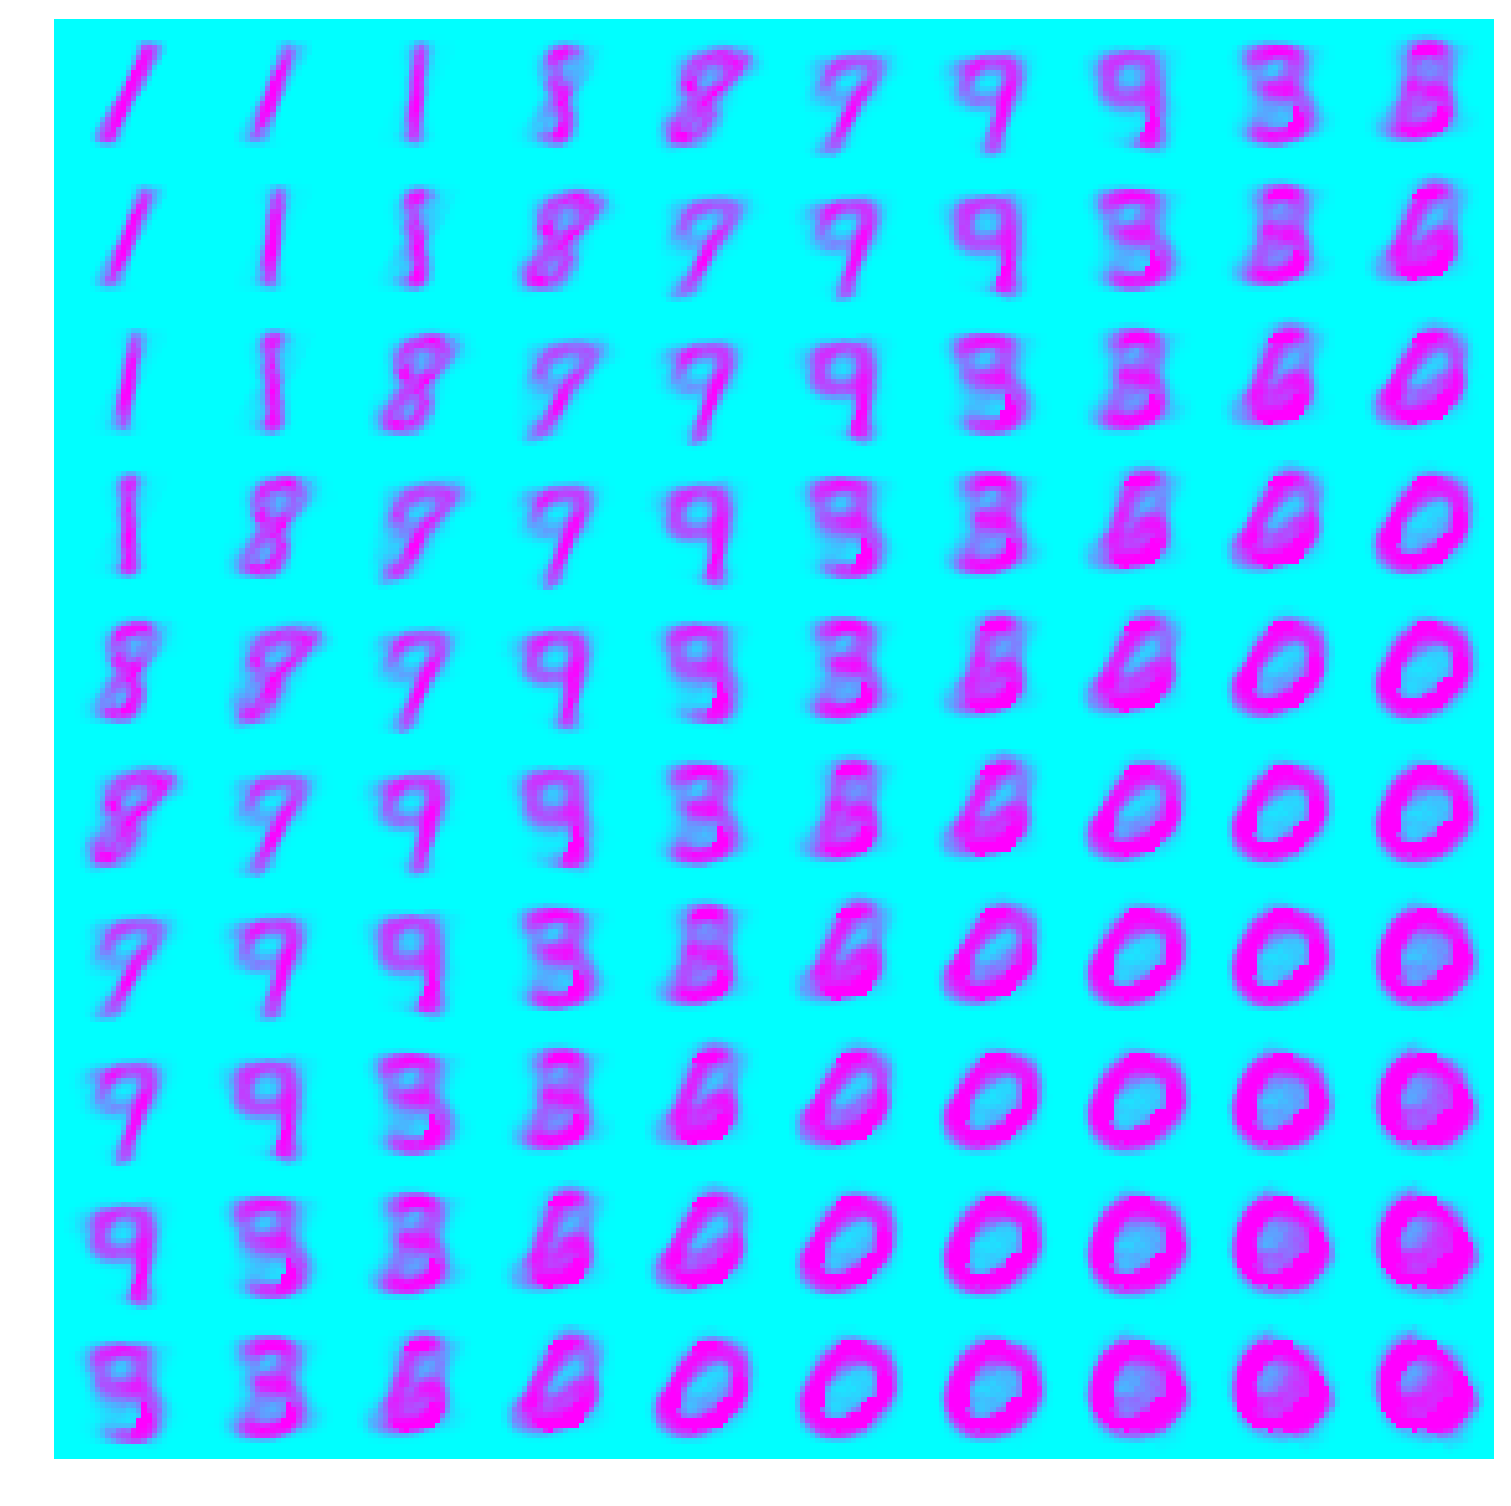

In [18]:
nrow = 10
ncol = 10

fig = plt.figure(figsize=(ncol+1, nrow+1)) 

gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 

for i in range(nrow):
    for j in range(ncol):
        im = images[i][j]
        ax= plt.subplot(gs[i,j])
        ax.imshow(im, cmap='cool')
        plt.axis('off')

plt.show()